In [6]:
import numpy as np
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from pyabc import BOLFI, Prior
import emcee
import scipy.stats as ss
import matplotlib.pyplot as plt

In [13]:
mu0 = 2.5
y0 = np.random.normal(mu0, 1, 2)

prior = Prior('uniform', 0, 5)

def simulator(mu):
    return np.random.normal(mu, 1, 2)

bolfi = BOLFI(priors=[prior], simulator=simulator, observation=y0, summaries=[np.mean], domain=[(0,5)])
thetas = bolfi.sample(threshold=0.5)

Starting Bayesian Optimization


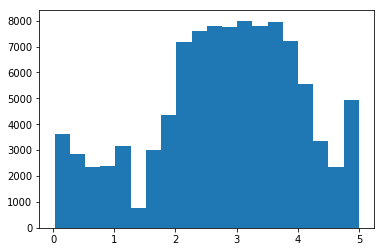

In [17]:
plt.hist(thetas, bins=20)
plt.show()